In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

### Mounting Csv file

In [ ]:
# Uploading csv file
df = pd.read_csv("NDAP_REPORT_7004.csv")
display(df)

### Data Cleaning

In [ ]:
# Replacing NaN with 0
df = df.replace(np.nan, 0)

# Converting datatype object to float 64 using pd.to_numeric function and changing zero to 0 using df.replace function for the next three rows
df['Number of census houses'] = pd.to_numeric(df.replace({'Number of census houses' : {'zero':0}})['Number of census houses'])
df['Houses having grass or thatch or bamboo etc. as material of wall'] = pd.to_numeric(df.replace({'Houses having grass or thatch or bamboo etc. as material of wall' : {'zero':0}})['Houses having grass or thatch or bamboo etc. as material of wall'])
df['Houses having plastic or polythene as material of wall'] = pd.to_numeric(df.replace({'Houses having plastic or polythene as material of wall' : {'zero':0}})['Houses having plastic or polythene as material of wall'])

df = df.round(0)

### Creating New dataframes

In [ ]:
# Defining a new datafram df_ which will contain the value obtained after dividing column J to S by column I and storing it as percent
df_ = pd.DataFrame()
# Adding the Type of residence column to df_ which will be used in further cells
df_['Type of residence namely rural or urban'] = df['Type of residence namely rural or urban']

# Looping over all columns
for col in df.columns.values:
  # Conditioning over datatype of column to obtain columns J to S
  if (df[col].dtype == 'float64') & (col != 'Number of census houses'):
    # Adding the columns to df_ as a ercent of column I
    df_[col + ' as a percent of no. of census houses'] = (df[col]/df['Number of census houses'])

df_.drop(df_.tail(1).index,inplace=True) # drop last n rows

df_new = pd.DataFrame
df_new = df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses']

df_list = []
#df_list = df['Houses having mud or unburnt brick as material of wall']/df['Number of census houses']
for i in range (0,1473):
  df_list.append(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'])

display(df_list)


# Question 1:

## a) Q-Q Plot for Uniform and Normal Distributions

In [ ]:
# Importing stats module from scipy library which contains distributions
import scipy.stats as stats
import statsmodels.api as sm

# QQ Plot for Uniform Distribution
fig1 = sm.qqplot(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'], dist=stats.uniform)
plt.title('QQ Plot for normal distribution')
plt.xlabel('Quantiles for Uniform distribution')
plt.ylabel('Quantiles for Sample data')
plt.show()

# QQ Plot for Gaussian Distribution
fig2 = sm.qqplot(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'])
plt.title('QQ Plot for Gaussian distribution')
plt.xlabel('Quantiles for Gaussian distribution')
plt.ylabel('Quantiles for Sample data')
plt.show()

## b) MLE estimates for Gaussian Distribution

In [ ]:
gaussian_mu = np.mean(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'])
gaussian_var = np.std(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'])

print("Mean =",gaussian_mu,", Variance =", gaussian_var)

## MLE estimates for Uniform Distribution

In [ ]:
uniform_a = np.min(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'])
uniform_b = np.max(df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'])

print("MLE parameters for Uniform distribution =",uniform_a,",", uniform_b)

### Note that upon plotting according to gaussian and uniform distributions simultaneously, Gaussian distribution will always give higher value of probability P(x) than the Uniform Distribution. Hence, Gaussian distribution best fits our data.

# Question 2:

## a) Q-Q Plot with respect to IQ function (tent function)

In [ ]:
# Defining a list for our given data
df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'] = df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'].fillna(0)
iq = df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses'].to_list()

# A Function that computes the Inverse of our CDF function
def Inverse_CDF(x):
    if x <= 0.5:
        value = -1 + (2*x)**0.5
    else:
        value = 1 - (2*(1-x))**0.5
    return value

# The following block computes the theoretical points at which we will find the value of our inverse cdf
bins = 1472
x_sep = []
for i in range(0,bins):
    x_sep.append(i/bins)

# iq_ is a list where we will store our theoretical quantiles    
iq_ = []
# Appending theoretical quantiles to iq_

for i in range(0, bins):
    iq_.append(Inverse_CDF(x_sep[i]))

In [ ]:
# Here, I have used scatter plot to find QQ plot. iq_ represents theoretical quantiles and sorted(iq) represents actual quantiles.
plt.scatter(iq_, sorted(iq))
plt.show

## b) Scaling and shifting the IQ function.
Derivation:
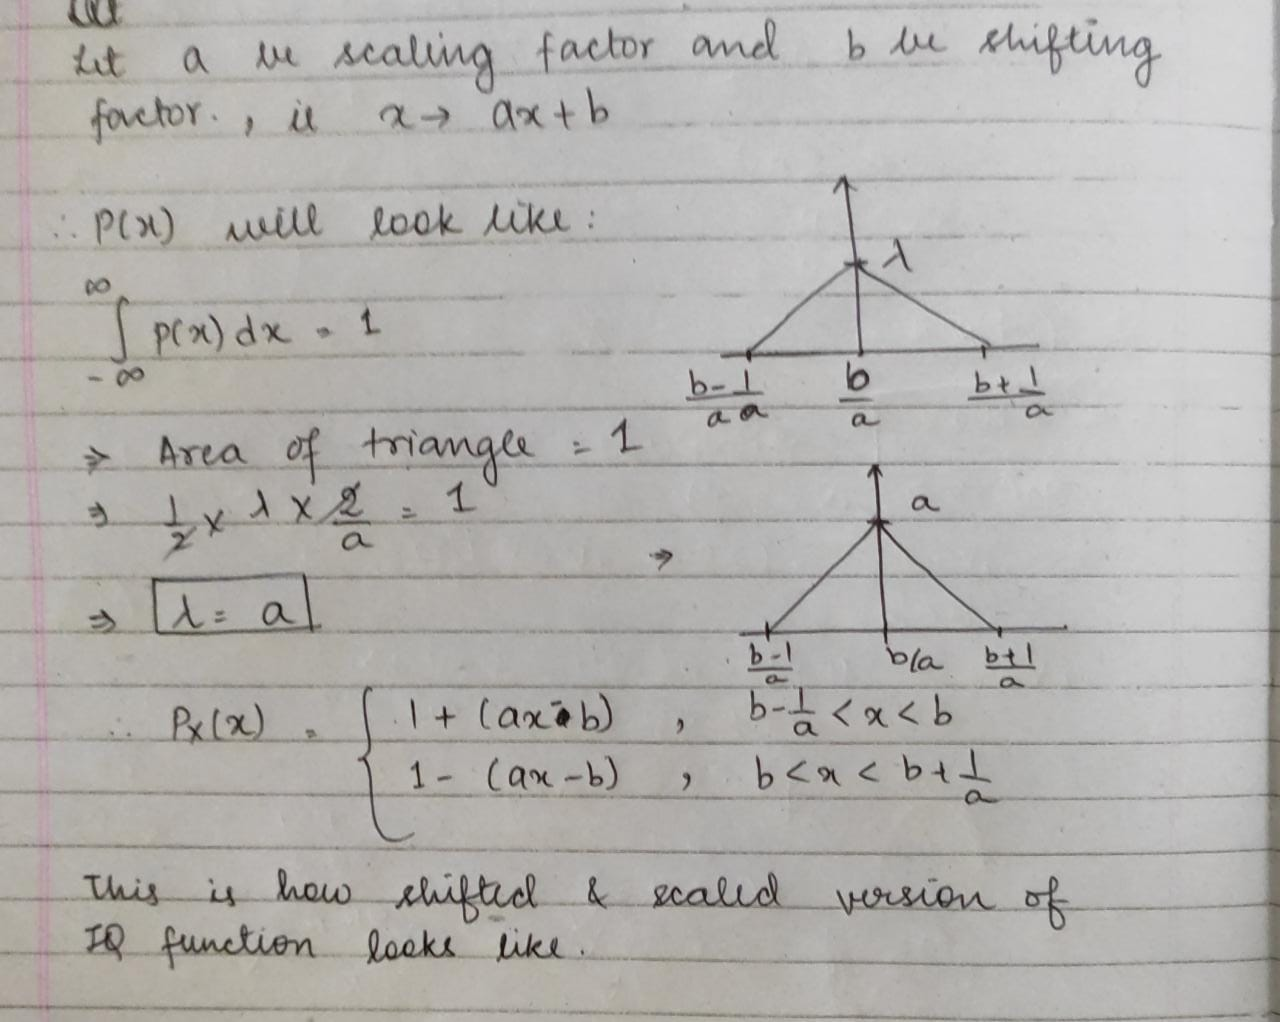

# Question 3:

In [ ]:
# Defining Some New dataframes
urban_df = pd.DataFrame
rural_df = pd.DataFrame
rural_df_ = pd.DataFrame
urban_df_ = pd.DataFrame

# Seggregating original dataframe according to type of residence
urban_df_ = df_[df_['Type of residence namely rural or urban'] == 'Urban']
rural_df_ = df_[df_['Type of residence namely rural or urban'] == 'Rural']

urban_df = urban_df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses']
rural_df = rural_df_['Houses having mud or unburnt brick as material of wall as a percent of no. of census houses']

# Data Cleaning
urban_df.replace(np.nan, 0)
rural_df.replace(np.nan, 0)


##a)
In this question, we have to check whether the percent of houses is large for urban or rural in the housing data. To check this, we can use the Independent t test. We can use this test to check whether the population of two samples is equal. For which, we first propose a null hypothesis and check whether our hypothesis is true.

In [ ]:
# Calculating variance of the 2 newly created dataframes. As the ration is less than 4:1, we can proceed with the t test.
print(np.var(rural_df), np.var(urban_df))

In [ ]:
# Performing independent t test
from scipy import stats
stats.ttest_ind(urban_df, rural_df)

As pvalue < 0.05, we reject the null hypothesis, as there is very less probability that our hypothesis is correct. Hence, we conclude that percent of houses is really large for rural vs usrban in our housing data.

## b) 
In this part, we have to check if we can predict percent of houses in either of urban or rural part using the other one. So, we use Spearman correlation test in this question. In Spearman correlation, instead of working with data values, we work with ranks. A low p value indicates that the two variables are very less probable to be not correlated

In [ ]:
# Performing Spearman correlation test
stats.spearmanr(urban_df, rural_df, nan_policy='omit')

As the pvalue is very small, the two are correlated and we can predict one based on the other.

## c)
In this part, we have to check whether there is a relation between body style and drive wheels in the data. If the pvalue is less than 0.05, we can conclude that there exists a relation between the two variables.

In [ ]:
# Uploading csv file for Automobile data
Automobile_df = pd.read_csv("Automobile_data.csv")
display(Automobile_df)



In [ ]:
# Replacing 4wd by fwd
Automobile_df = Automobile_df.replace("4wd", "fwd")
# Creating new dataframe with desired columns
Automobile_df_1 = Automobile_df[['body-style','drive-wheels']]
# Grouping our dataframe according to fwd and rwd
auto_df = Automobile_df_1.groupby(['body-style']).value_counts()
display(auto_df)

In [ ]:
# Creating a list out of auto_df dataframe
auto_samples = auto_df.to_list()
# List with fwd body style
fwd_list = []
# List for rwd body style
rwd_list = []

# Appending to our new lists accordingly 
for i in range(0, 10):
    if (i%2 == 0):
        rwd_list.append(auto_samples[i])
    else:
        fwd_list.append(auto_samples[i])

# Creating a matrix from those rwd_list and fwd_list
table = [rwd_list, fwd_list]

# importing chi2_contingency module from scipy.stats
from scipy import stats
from scipy.stats import chi2_contingency

# Performing chie squared test
statistics, pvalue, ddof, expected_values = stats.chi2_contingency(table)

print("rwd = ", expected_values[0])
print("fwd = ", expected_values[1])
print("statistic = ", statistics)
print("pvalue = ", pvalue)

Here, as pvalue is much greater than 0.05, our null hypothesis is correct and there is no relation between body styles and drive wheels.

# References

1.   [Scipy.stats documentation](https://docs.scipy.org/doc/scipy/reference/stats.html)
2.   [Pandas documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
3.   Geeks for Geeks
4.   StackOverflow

